In [14]:
# Import Library Dependencies
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

# Import Custom API Functions
from apidata import quandl_stock_data

%matplotlib notebook

In [15]:
# Portfolio Stock Selection
pfolio_assets = ["F", "GOOG", "TSLA"]
print(f'Number of Portfolio Assets: {len(pfolio_assets)}')

Number of Portfolio Assets: 3


In [16]:
# Initializing DataFrame
portfolio = quandl_stock_data(pfolio_assets[0], verbose=True) \
            .rename(columns={"Close": pfolio_assets[0].upper()})[pfolio_assets[0].upper()] \
            .reset_index()


[Quandl] Query API Summary:

--------------------------------------------------------------------------- 

- symbol: F
- start_date: 2014-01-01
- end_date: 2019-01-01
- collapse: monthly
- data_type: pandas

 --------------------------------------------------------------------------- 


[Preview] Response DataFrame


              Open   High    Low  Close      Volume
Date                                              
2014-01-02  15.42  15.45  15.28  15.44  31528500.0
2014-01-03  15.52  15.64  15.30  15.51  46122300.0
2014-01-06  15.72  15.76  15.52  15.58  42657600.0
2014-01-07  15.73  15.74  15.35  15.38  54476300.0
2014-01-08  15.60  15.71  15.51  15.54  48448300.0
2014-01-09  15.83  16.02  15.77  15.84  67836500.0
2014-01-10  16.01  16.11  15.94  16.07  44984000.0
2014-01-13  16.37  16.53  16.08  16.11  57566400.0
2014-01-14  16.31  16.43  16.17  16.40  44039200.0
2014-01-15  16.37  16.73  16.35  16.70  64118200.0 

-----------------------------------------------------------------

In [17]:
# Generate Portfolio DataFrame:
# [1] Query Stock Return Data - Quandl API Call
# [2] Merge Stock Returns into Portfolio DataFrame 

for i, stock in enumerate(pfolio_assets[1:]):
    print(f"<Quandl API Call> [{i+1}] Stock Symbol: {stock}")
    add_stock = quandl_stock_data(stock) \
                .rename(columns={"Close": stock})[stock] \
                .reset_index()
    
    portfolio = pd.merge(portfolio, add_stock, on="Date", how="inner")
    
print (f"\nAsset Returns: Merged // Portfolio DataFrame: <Complete>")

<Quandl API Call> [1] Stock Symbol: GOOG
<Quandl API Call> [2] Stock Symbol: TSLA

Asset Returns: Merged // Portfolio DataFrame: <Complete>


In [18]:
# Set DataFrame Index (Date)
portfolio.set_index("Date", inplace=True)
portfolio.head(15)

,F,GOOG,TSLA
Date,,,
2014-03-27,15.25,558.46,207.320
2014-03-28,15.45,559.99,212.370
2014-03-31,15.60,556.97,208.450
2014-04-01,16.32,567.16,216.970
2014-04-02,16.46,567.00,230.290
2014-04-03,16.39,569.74,225.400
2014-04-04,16.13,543.14,212.225
2014-04-07,15.94,538.15,207.520
2014-04-08,16.10,554.90,215.460


In [19]:
# View DataFrame -- Data Completeness
portfolio.count()

F       1007
GOOG    1007
TSLA    1007
dtype: int64

<IPython.core.display.Javascript object>


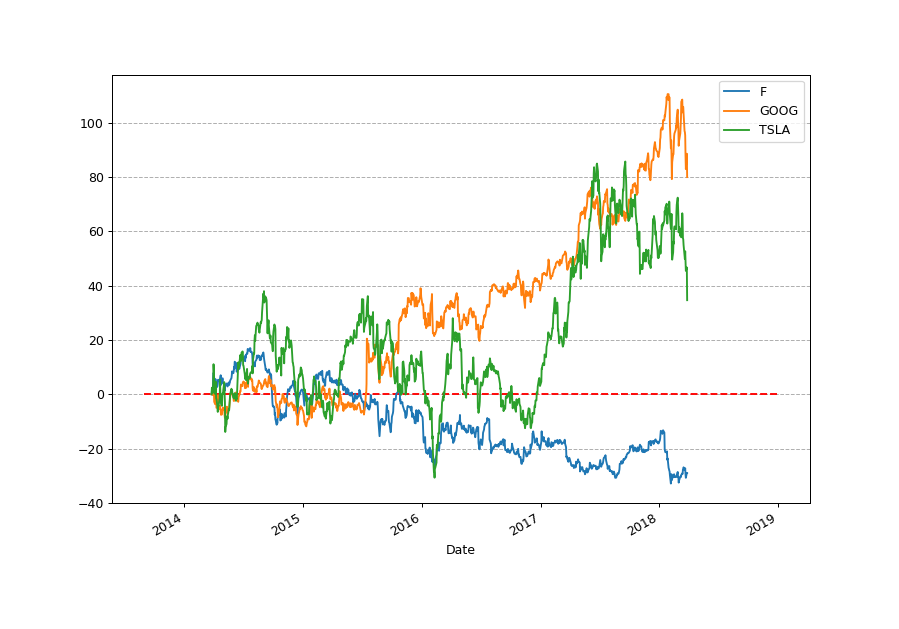

In [20]:
# [Visualize] Plot Data Frame -- Closing Prices
visual_plot = ((portfolio/portfolio.iloc[0] * 100) - 100).plot(figsize=(10,7))
plt.grid(axis="y", linestyle="dashed")
plt.hlines(0, "2013-09-01", "2019-01-01", linestyle="dashed", color="red")

In [8]:
# Convert Stock Price Data into Log Returns -- Removed Offset Row
log_returns = np.log(portfolio / portfolio.shift(1)).iloc[1:]
log_returns[:15]

,F,GOOG,TSLA
Date,,,
2014-03-28,0.013030,0.002736,0.024067
2014-03-31,0.009662,-0.005408,-0.018631
2014-04-01,0.045120,0.018130,0.040060
2014-04-02,0.008542,-0.000282,0.059580
2014-04-03,-0.004262,0.004821,-0.021463
2014-04-04,-0.015991,-0.047813,-0.060230
2014-04-07,-0.011849,-0.009230,-0.022419
2014-04-08,0.009988,0.030651,0.037548
2014-04-09,-0.016281,0.016515,0.006799


In [21]:
# Calculate Average Annual Log Returns 
log_returns.mean()*250

F      -0.085055
GOOG    0.146039
TSLA    0.073955
dtype: float64

In [22]:
# Portfolio Asset Covariance Matrix
log_returns.cov() * 250

,F,GOOG,TSLA
F,0.052101,0.016789,0.023396
GOOG,0.016789,0.050494,0.029402
TSLA,0.023396,0.029402,0.152522


In [23]:
# Portfolio Asset Correlation Matrix
log_returns.corr()

,F,GOOG,TSLA
F,1.000000,0.327321,0.262458
GOOG,0.327321,1.000000,0.335037
TSLA,0.262458,0.335037,1.000000


In [24]:
# Count Number of Assets in Portfolio
num_assets = (len(pfolio_assets) )
num_assets

3

In [25]:
# Simulate 10k Random Portfolios
pfolio_sims = []
pfolio = {}

mkt_return = .098
sim_trials = 2500
for i in range(sim_trials):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    WTSp = zip(pfolio_assets, weights)
    RTNp = np.sum(weights * log_returns.mean()) * 250
    VOLp = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    
    pfolio = {a:round(wt, 4) for a,wt in WTSp}
    pfolio["RTN"] = round(RTNp, 4)
    pfolio["VOL"] = round(VOLp, 4)
    pfolio["Sharpe"] = round((RTNp - mkt_return)/VOLp, 4)
    pfolio_sims.append(pfolio)
    
    print("\n",pfolio, "\n")

print(">>> Data Points Generated -- Simulation Complete <<<")


 {'F': 0.2868, 'GOOG': 0.4108, 'TSLA': 0.3024, 'RTN': 0.058, 'VOL': 0.2051, 'Sharpe': -0.1951} 


 {'F': 0.3616, 'GOOG': 0.2902, 'TSLA': 0.3482, 'RTN': 0.0374, 'VOL': 0.2119, 'Sharpe': -0.286} 


 {'F': 0.1984, 'GOOG': 0.5504, 'TSLA': 0.2512, 'RTN': 0.0821, 'VOL': 0.2027, 'Sharpe': -0.0785} 


 {'F': 0.0137, 'GOOG': 0.5387, 'TSLA': 0.4477, 'RTN': 0.1106, 'VOL': 0.2448, 'Sharpe': 0.0515} 


 {'F': 0.4636, 'GOOG': 0.3145, 'TSLA': 0.2219, 'RTN': 0.0229, 'VOL': 0.1937, 'Sharpe': -0.3877} 


 {'F': 0.1665, 'GOOG': 0.6459, 'TSLA': 0.1876, 'RTN': 0.094, 'VOL': 0.2002, 'Sharpe': -0.0198} 


 {'F': 0.3022, 'GOOG': 0.011, 'TSLA': 0.6868, 'RTN': 0.0267, 'VOL': 0.2949, 'Sharpe': -0.2418} 


 {'F': 0.1111, 'GOOG': 0.1914, 'TSLA': 0.6975, 'RTN': 0.0701, 'VOL': 0.2981, 'Sharpe': -0.0936} 


 {'F': 0.0572, 'GOOG': 0.4719, 'TSLA': 0.4709, 'RTN': 0.0989, 'VOL': 0.2459, 'Sharpe': 0.0036} 


 {'F': 0.2321, 'GOOG': 0.3883, 'TSLA': 0.3795, 'RTN': 0.065, 'VOL': 0.2196, 'Sharpe': -0.1502} 


 {'F': 0.3007, '


 {'F': 0.3845, 'GOOG': 0.3112, 'TSLA': 0.3043, 'RTN': 0.0352, 'VOL': 0.2044, 'Sharpe': -0.307} 


 {'F': 0.3966, 'GOOG': 0.304, 'TSLA': 0.2994, 'RTN': 0.0328, 'VOL': 0.2037, 'Sharpe': -0.3201} 


 {'F': 0.344, 'GOOG': 0.5569, 'TSLA': 0.0991, 'RTN': 0.0594, 'VOL': 0.186, 'Sharpe': -0.2075} 


 {'F': 0.1903, 'GOOG': 0.7928, 'TSLA': 0.0169, 'RTN': 0.1008, 'VOL': 0.1992, 'Sharpe': 0.0143} 


 {'F': 0.0737, 'GOOG': 0.5072, 'TSLA': 0.4191, 'RTN': 0.0988, 'VOL': 0.2351, 'Sharpe': 0.0034} 


 {'F': 0.1202, 'GOOG': 0.2223, 'TSLA': 0.6575, 'RTN': 0.0709, 'VOL': 0.287, 'Sharpe': -0.0945} 


 {'F': 0.1581, 'GOOG': 0.3255, 'TSLA': 0.5164, 'RTN': 0.0723, 'VOL': 0.2505, 'Sharpe': -0.1027} 


 {'F': 0.1028, 'GOOG': 0.4454, 'TSLA': 0.4518, 'RTN': 0.0897, 'VOL': 0.2393, 'Sharpe': -0.0346} 


 {'F': 0.0853, 'GOOG': 0.7191, 'TSLA': 0.1956, 'RTN': 0.1122, 'VOL': 0.2084, 'Sharpe': 0.0683} 


 {'F': 0.5274, 'GOOG': 0.2607, 'TSLA': 0.2119, 'RTN': 0.0089, 'VOL': 0.1946, 'Sharpe': -0.4579} 


 {'F': 0.4367, 'G

 {'F': 0.3379, 'GOOG': 0.3171, 'TSLA': 0.345, 'RTN': 0.0431, 'VOL': 0.2113, 'Sharpe': -0.2598} 


 {'F': 0.3302, 'GOOG': 0.0515, 'TSLA': 0.6184, 'RTN': 0.0252, 'VOL': 0.2759, 'Sharpe': -0.264} 


 {'F': 0.0725, 'GOOG': 0.1029, 'TSLA': 0.8247, 'RTN': 0.0698, 'VOL': 0.3355, 'Sharpe': -0.0839} 


 {'F': 0.1449, 'GOOG': 0.6746, 'TSLA': 0.1805, 'RTN': 0.0995, 'VOL': 0.2018, 'Sharpe': 0.0077} 


 {'F': 0.056, 'GOOG': 0.1525, 'TSLA': 0.7914, 'RTN': 0.076, 'VOL': 0.3261, 'Sharpe': -0.0673} 


 {'F': 0.5966, 'GOOG': 0.3659, 'TSLA': 0.0374, 'RTN': 0.0055, 'VOL': 0.1863, 'Sharpe': -0.4967} 


 {'F': 0.3264, 'GOOG': 0.4424, 'TSLA': 0.2311, 'RTN': 0.0539, 'VOL': 0.1949, 'Sharpe': -0.2261} 


 {'F': 0.2188, 'GOOG': 0.5218, 'TSLA': 0.2594, 'RTN': 0.0768, 'VOL': 0.2024, 'Sharpe': -0.1049} 


 {'F': 0.8793, 'GOOG': 0.0582, 'TSLA': 0.0626, 'RTN': -0.0617, 'VOL': 0.2134, 'Sharpe': -0.7481} 


 {'F': 0.6528, 'GOOG': 0.102, 'TSLA': 0.2451, 'RTN': -0.0225, 'VOL': 0.2076, 'Sharpe': -0.5805} 


 {'F': 0.1466,

 {'F': 0.2576, 'GOOG': 0.6561, 'TSLA': 0.0863, 'RTN': 0.0803, 'VOL': 0.1907, 'Sharpe': -0.0929} 


 {'F': 0.5848, 'GOOG': 0.0634, 'TSLA': 0.3518, 'RTN': -0.0145, 'VOL': 0.2216, 'Sharpe': -0.5076} 


 {'F': 0.3398, 'GOOG': 0.3978, 'TSLA': 0.2624, 'RTN': 0.0486, 'VOL': 0.1984, 'Sharpe': -0.249} 


 {'F': 0.0669, 'GOOG': 0.3313, 'TSLA': 0.6018, 'RTN': 0.0872, 'VOL': 0.2745, 'Sharpe': -0.0394} 


 {'F': 0.3435, 'GOOG': 0.0119, 'TSLA': 0.6446, 'RTN': 0.0202, 'VOL': 0.2837, 'Sharpe': -0.2742} 


 {'F': 0.1947, 'GOOG': 0.3733, 'TSLA': 0.432, 'RTN': 0.0699, 'VOL': 0.2309, 'Sharpe': -0.1217} 


 {'F': 0.0944, 'GOOG': 0.1934, 'TSLA': 0.7122, 'RTN': 0.0729, 'VOL': 0.3026, 'Sharpe': -0.083} 


 {'F': 0.1456, 'GOOG': 0.3569, 'TSLA': 0.4975, 'RTN': 0.0765, 'VOL': 0.2467, 'Sharpe': -0.087} 


 {'F': 0.2954, 'GOOG': 0.2555, 'TSLA': 0.4491, 'RTN': 0.0454, 'VOL': 0.2326, 'Sharpe': -0.2262} 


 {'F': 0.1719, 'GOOG': 0.4372, 'TSLA': 0.391, 'RTN': 0.0781, 'VOL': 0.2241, 'Sharpe': -0.0886} 


 {'F': 0.1523,


 {'F': 0.6495, 'GOOG': 0.219, 'TSLA': 0.1315, 'RTN': -0.0135, 'VOL': 0.1937, 'Sharpe': -0.5759} 


 {'F': 0.4359, 'GOOG': 0.3507, 'TSLA': 0.2133, 'RTN': 0.0299, 'VOL': 0.1922, 'Sharpe': -0.3542} 


 {'F': 0.4949, 'GOOG': 0.0741, 'TSLA': 0.4309, 'RTN': 0.0006, 'VOL': 0.2334, 'Sharpe': -0.4174} 


 {'F': 0.6577, 'GOOG': 0.223, 'TSLA': 0.1192, 'RTN': -0.0146, 'VOL': 0.1933, 'Sharpe': -0.5822} 


 {'F': 0.1716, 'GOOG': 0.4022, 'TSLA': 0.4262, 'RTN': 0.0757, 'VOL': 0.2307, 'Sharpe': -0.0968} 


 {'F': 0.1357, 'GOOG': 0.1627, 'TSLA': 0.7016, 'RTN': 0.0641, 'VOL': 0.2988, 'Sharpe': -0.1134} 


 {'F': 0.0661, 'GOOG': 0.4027, 'TSLA': 0.5312, 'RTN': 0.0925, 'VOL': 0.258, 'Sharpe': -0.0214} 


 {'F': 0.2833, 'GOOG': 0.2321, 'TSLA': 0.4846, 'RTN': 0.0456, 'VOL': 0.2408, 'Sharpe': -0.2175} 


 {'F': 0.2032, 'GOOG': 0.5311, 'TSLA': 0.2657, 'RTN': 0.0799, 'VOL': 0.204, 'Sharpe': -0.0886} 


 {'F': 0.2962, 'GOOG': 0.443, 'TSLA': 0.2608, 'RTN': 0.0588, 'VOL': 0.1992, 'Sharpe': -0.1969} 


 {'F': 0.231


 {'F': 0.3333, 'GOOG': 0.2233, 'TSLA': 0.4434, 'RTN': 0.0371, 'VOL': 0.2314, 'Sharpe': -0.2634} 


 {'F': 0.6648, 'GOOG': 0.0323, 'TSLA': 0.3029, 'RTN': -0.0294, 'VOL': 0.2186, 'Sharpe': -0.5829} 


 {'F': 0.3997, 'GOOG': 0.2185, 'TSLA': 0.3819, 'RTN': 0.0262, 'VOL': 0.219, 'Sharpe': -0.3281} 


 {'F': 0.3293, 'GOOG': 0.2378, 'TSLA': 0.4329, 'RTN': 0.0387, 'VOL': 0.229, 'Sharpe': -0.2588} 


 {'F': 0.3061, 'GOOG': 0.2243, 'TSLA': 0.4696, 'RTN': 0.0415, 'VOL': 0.2372, 'Sharpe': -0.2384} 


 {'F': 0.4327, 'GOOG': 0.5621, 'TSLA': 0.0052, 'RTN': 0.0457, 'VOL': 0.1848, 'Sharpe': -0.2831} 


 {'F': 0.3134, 'GOOG': 0.2539, 'TSLA': 0.4327, 'RTN': 0.0424, 'VOL': 0.2289, 'Sharpe': -0.2428} 


 {'F': 0.343, 'GOOG': 0.4042, 'TSLA': 0.2528, 'RTN': 0.0485, 'VOL': 0.1971, 'Sharpe': -0.2509} 


 {'F': 0.4088, 'GOOG': 0.2138, 'TSLA': 0.3774, 'RTN': 0.0244, 'VOL': 0.2183, 'Sharpe': -0.3374} 


 {'F': 0.3373, 'GOOG': 0.3634, 'TSLA': 0.2993, 'RTN': 0.0465, 'VOL': 0.2037, 'Sharpe': -0.2528} 


 {'F': 0.39

 {'F': 0.0135, 'GOOG': 0.6937, 'TSLA': 0.2928, 'RTN': 0.1218, 'VOL': 0.2232, 'Sharpe': 0.1067} 


 {'F': 0.4477, 'GOOG': 0.2145, 'TSLA': 0.3378, 'RTN': 0.0182, 'VOL': 0.2115, 'Sharpe': -0.3772} 


 {'F': 0.0745, 'GOOG': 0.0953, 'TSLA': 0.8302, 'RTN': 0.069, 'VOL': 0.3371, 'Sharpe': -0.0861} 


 {'F': 0.3751, 'GOOG': 0.3949, 'TSLA': 0.23, 'RTN': 0.0428, 'VOL': 0.194, 'Sharpe': -0.2847} 


 {'F': 0.1316, 'GOOG': 0.193, 'TSLA': 0.6754, 'RTN': 0.0669, 'VOL': 0.2916, 'Sharpe': -0.1065} 


 {'F': 0.1531, 'GOOG': 0.704, 'TSLA': 0.1429, 'RTN': 0.1004, 'VOL': 0.1998, 'Sharpe': 0.0118} 


 {'F': 0.2553, 'GOOG': 0.3342, 'TSLA': 0.4105, 'RTN': 0.0575, 'VOL': 0.2249, 'Sharpe': -0.1803} 


 {'F': 0.3766, 'GOOG': 0.602, 'TSLA': 0.0214, 'RTN': 0.0575, 'VOL': 0.1858, 'Sharpe': -0.2182} 


 {'F': 0.0507, 'GOOG': 0.5059, 'TSLA': 0.4435, 'RTN': 0.1024, 'VOL': 0.2412, 'Sharpe': 0.0181} 


 {'F': 0.5433, 'GOOG': 0.1156, 'TSLA': 0.3411, 'RTN': -0.0041, 'VOL': 0.2166, 'Sharpe': -0.4715} 


 {'F': 0.436, 'GOOG


 {'F': 0.3916, 'GOOG': 0.3791, 'TSLA': 0.2293, 'RTN': 0.039, 'VOL': 0.1938, 'Sharpe': -0.3043} 


 {'F': 0.3052, 'GOOG': 0.089, 'TSLA': 0.6058, 'RTN': 0.0318, 'VOL': 0.272, 'Sharpe': -0.2433} 


 {'F': 0.2539, 'GOOG': 0.0958, 'TSLA': 0.6503, 'RTN': 0.0405, 'VOL': 0.2838, 'Sharpe': -0.2027} 


 {'F': 0.0344, 'GOOG': 0.4861, 'TSLA': 0.4796, 'RTN': 0.1035, 'VOL': 0.2492, 'Sharpe': 0.0222} 


 {'F': 0.0073, 'GOOG': 0.4831, 'TSLA': 0.5096, 'RTN': 0.1076, 'VOL': 0.2572, 'Sharpe': 0.0374} 


 {'F': 0.0556, 'GOOG': 0.4762, 'TSLA': 0.4682, 'RTN': 0.0994, 'VOL': 0.2455, 'Sharpe': 0.0059} 


 {'F': 0.0698, 'GOOG': 0.75, 'TSLA': 0.1803, 'RTN': 0.1169, 'VOL': 0.2095, 'Sharpe': 0.0903} 


 {'F': 0.3595, 'GOOG': 0.2192, 'TSLA': 0.4212, 'RTN': 0.0326, 'VOL': 0.2267, 'Sharpe': -0.2886} 


 {'F': 0.4329, 'GOOG': 0.0572, 'TSLA': 0.5099, 'RTN': 0.0092, 'VOL': 0.2499, 'Sharpe': -0.3551} 


 {'F': 0.4085, 'GOOG': 0.3469, 'TSLA': 0.2446, 'RTN': 0.034, 'VOL': 0.1958, 'Sharpe': -0.3269} 


 {'F': 0.2968, 'GOO

 {'F': 0.2535, 'GOOG': 0.4854, 'TSLA': 0.2611, 'RTN': 0.0686, 'VOL': 0.2008, 'Sharpe': -0.1463} 


 {'F': 0.3128, 'GOOG': 0.6195, 'TSLA': 0.0678, 'RTN': 0.0689, 'VOL': 0.1875, 'Sharpe': -0.1554} 


 {'F': 0.8384, 'GOOG': 0.0087, 'TSLA': 0.1529, 'RTN': -0.0587, 'VOL': 0.2157, 'Sharpe': -0.7267} 


 {'F': 0.3737, 'GOOG': 0.1241, 'TSLA': 0.5023, 'RTN': 0.0235, 'VOL': 0.246, 'Sharpe': -0.3029} 


 {'F': 0.3276, 'GOOG': 0.4277, 'TSLA': 0.2447, 'RTN': 0.0527, 'VOL': 0.1964, 'Sharpe': -0.2307} 


 {'F': 0.1937, 'GOOG': 0.3592, 'TSLA': 0.4471, 'RTN': 0.069, 'VOL': 0.2341, 'Sharpe': -0.1237} 


 {'F': 0.4709, 'GOOG': 0.423, 'TSLA': 0.1061, 'RTN': 0.0296, 'VOL': 0.1843, 'Sharpe': -0.3713} 


 {'F': 0.0152, 'GOOG': 0.5282, 'TSLA': 0.4567, 'RTN': 0.1096, 'VOL': 0.2463, 'Sharpe': 0.0472} 


 {'F': 0.107, 'GOOG': 0.7397, 'TSLA': 0.1532, 'RTN': 0.1103, 'VOL': 0.2047, 'Sharpe': 0.0599} 


 {'F': 0.2265, 'GOOG': 0.5957, 'TSLA': 0.1777, 'RTN': 0.0809, 'VOL': 0.1951, 'Sharpe': -0.0878} 


 {'F': 0.2454, 


 {'F': 0.7041, 'GOOG': 0.1128, 'TSLA': 0.1832, 'RTN': -0.0299, 'VOL': 0.2037, 'Sharpe': -0.6277} 


 {'F': 0.3917, 'GOOG': 0.1774, 'TSLA': 0.4308, 'RTN': 0.0245, 'VOL': 0.2294, 'Sharpe': -0.3206} 


 {'F': 0.4396, 'GOOG': 0.1073, 'TSLA': 0.4531, 'RTN': 0.0118, 'VOL': 0.2361, 'Sharpe': -0.3652} 


 {'F': 0.2865, 'GOOG': 0.3851, 'TSLA': 0.3284, 'RTN': 0.0562, 'VOL': 0.2092, 'Sharpe': -0.2001} 


 {'F': 0.6457, 'GOOG': 0.2854, 'TSLA': 0.0689, 'RTN': -0.0082, 'VOL': 0.1897, 'Sharpe': -0.5596} 


 {'F': 0.3125, 'GOOG': 0.4459, 'TSLA': 0.2416, 'RTN': 0.0564, 'VOL': 0.1964, 'Sharpe': -0.2118} 


 {'F': 0.5593, 'GOOG': 0.3137, 'TSLA': 0.127, 'RTN': 0.0076, 'VOL': 0.1878, 'Sharpe': -0.481} 


 {'F': 0.131, 'GOOG': 0.5934, 'TSLA': 0.2756, 'RTN': 0.0959, 'VOL': 0.2102, 'Sharpe': -0.01} 


 {'F': 0.4688, 'GOOG': 0.2989, 'TSLA': 0.2323, 'RTN': 0.021, 'VOL': 0.1951, 'Sharpe': -0.3948} 


 {'F': 0.4603, 'GOOG': 0.0759, 'TSLA': 0.4638, 'RTN': 0.0062, 'VOL': 0.2395, 'Sharpe': -0.3831} 


 {'F': 0.3599


 {'F': 0.5753, 'GOOG': 0.0241, 'TSLA': 0.4006, 'RTN': -0.0158, 'VOL': 0.2314, 'Sharpe': -0.4916} 


 {'F': 0.1604, 'GOOG': 0.5338, 'TSLA': 0.3058, 'RTN': 0.0869, 'VOL': 0.2116, 'Sharpe': -0.0523} 


 {'F': 0.1689, 'GOOG': 0.0822, 'TSLA': 0.7489, 'RTN': 0.053, 'VOL': 0.3121, 'Sharpe': -0.1441} 


 {'F': 0.3614, 'GOOG': 0.3197, 'TSLA': 0.3189, 'RTN': 0.0395, 'VOL': 0.2067, 'Sharpe': -0.2828} 


 {'F': 0.562, 'GOOG': 0.2424, 'TSLA': 0.1956, 'RTN': 0.0021, 'VOL': 0.1943, 'Sharpe': -0.4937} 


 {'F': 0.0198, 'GOOG': 0.3984, 'TSLA': 0.5818, 'RTN': 0.0995, 'VOL': 0.2722, 'Sharpe': 0.0056} 


 {'F': 0.6875, 'GOOG': 0.1302, 'TSLA': 0.1822, 'RTN': -0.026, 'VOL': 0.202, 'Sharpe': -0.6137} 


 {'F': 0.492, 'GOOG': 0.4559, 'TSLA': 0.052, 'RTN': 0.0286, 'VOL': 0.1834, 'Sharpe': -0.3784} 


 {'F': 0.774, 'GOOG': 0.2088, 'TSLA': 0.0172, 'RTN': -0.0341, 'VOL': 0.1993, 'Sharpe': -0.6627} 


 {'F': 0.2935, 'GOOG': 0.5645, 'TSLA': 0.142, 'RTN': 0.068, 'VOL': 0.1894, 'Sharpe': -0.1585} 


 {'F': 0.4953, '


 {'F': 0.3944, 'GOOG': 0.4144, 'TSLA': 0.1911, 'RTN': 0.0411, 'VOL': 0.1898, 'Sharpe': -0.2997} 


 {'F': 0.4172, 'GOOG': 0.2311, 'TSLA': 0.3517, 'RTN': 0.0243, 'VOL': 0.2133, 'Sharpe': -0.3455} 


 {'F': 0.2863, 'GOOG': 0.4511, 'TSLA': 0.2627, 'RTN': 0.061, 'VOL': 0.1997, 'Sharpe': -0.1855} 


 {'F': 0.3028, 'GOOG': 0.4452, 'TSLA': 0.252, 'RTN': 0.0579, 'VOL': 0.1979, 'Sharpe': -0.2026} 


 {'F': 0.2723, 'GOOG': 0.3428, 'TSLA': 0.3849, 'RTN': 0.0554, 'VOL': 0.2195, 'Sharpe': -0.1942} 


 {'F': 0.3106, 'GOOG': 0.3163, 'TSLA': 0.3731, 'RTN': 0.0474, 'VOL': 0.2167, 'Sharpe': -0.2336} 


 {'F': 0.1657, 'GOOG': 0.4149, 'TSLA': 0.4194, 'RTN': 0.0775, 'VOL': 0.2297, 'Sharpe': -0.0892} 


 {'F': 0.2368, 'GOOG': 0.0275, 'TSLA': 0.7357, 'RTN': 0.0383, 'VOL': 0.3083, 'Sharpe': -0.1937} 


 {'F': 0.2783, 'GOOG': 0.1562, 'TSLA': 0.5655, 'RTN': 0.041, 'VOL': 0.2609, 'Sharpe': -0.2186} 


 {'F': 0.0968, 'GOOG': 0.382, 'TSLA': 0.5212, 'RTN': 0.0861, 'VOL': 0.2542, 'Sharpe': -0.0468} 


 {'F': 0.3177

 {'F': 0.3536, 'GOOG': 0.4099, 'TSLA': 0.2365, 'RTN': 0.0473, 'VOL': 0.195, 'Sharpe': -0.2602} 


 {'F': 0.0184, 'GOOG': 0.4501, 'TSLA': 0.5315, 'RTN': 0.1035, 'VOL': 0.261, 'Sharpe': 0.021} 


 {'F': 0.2812, 'GOOG': 0.3034, 'TSLA': 0.4154, 'RTN': 0.0511, 'VOL': 0.2254, 'Sharpe': -0.208} 


 {'F': 0.2305, 'GOOG': 0.6173, 'TSLA': 0.1522, 'RTN': 0.0818, 'VOL': 0.1936, 'Sharpe': -0.0836} 


 {'F': 0.4588, 'GOOG': 0.094, 'TSLA': 0.4472, 'RTN': 0.0078, 'VOL': 0.2355, 'Sharpe': -0.3832} 


 {'F': 0.0883, 'GOOG': 0.3145, 'TSLA': 0.5972, 'RTN': 0.0826, 'VOL': 0.2725, 'Sharpe': -0.0566} 


 {'F': 0.4087, 'GOOG': 0.4798, 'TSLA': 0.1115, 'RTN': 0.0436, 'VOL': 0.1846, 'Sharpe': -0.2949} 


 {'F': 0.2062, 'GOOG': 0.4393, 'TSLA': 0.3545, 'RTN': 0.0728, 'VOL': 0.2162, 'Sharpe': -0.1164} 


 {'F': 0.1593, 'GOOG': 0.1523, 'TSLA': 0.6884, 'RTN': 0.0596, 'VOL': 0.2948, 'Sharpe': -0.1303} 


 {'F': 0.3391, 'GOOG': 0.2897, 'TSLA': 0.3712, 'RTN': 0.0409, 'VOL': 0.2162, 'Sharpe': -0.264} 


 {'F': 0.2605, 'G


 {'F': 0.5432, 'GOOG': 0.2956, 'TSLA': 0.1612, 'RTN': 0.0089, 'VOL': 0.1898, 'Sharpe': -0.4694} 


 {'F': 0.2414, 'GOOG': 0.4963, 'TSLA': 0.2622, 'RTN': 0.0713, 'VOL': 0.2015, 'Sharpe': -0.1323} 


 {'F': 0.5061, 'GOOG': 0.4324, 'TSLA': 0.0615, 'RTN': 0.0246, 'VOL': 0.1837, 'Sharpe': -0.3994} 


 {'F': 0.4206, 'GOOG': 0.1912, 'TSLA': 0.3882, 'RTN': 0.0209, 'VOL': 0.2208, 'Sharpe': -0.3493} 


 {'F': 0.2617, 'GOOG': 0.2816, 'TSLA': 0.4567, 'RTN': 0.0526, 'VOL': 0.2346, 'Sharpe': -0.1934} 


 {'F': 0.3496, 'GOOG': 0.2933, 'TSLA': 0.3571, 'RTN': 0.0395, 'VOL': 0.2135, 'Sharpe': -0.2739} 


 {'F': 0.3774, 'GOOG': 0.1988, 'TSLA': 0.4239, 'RTN': 0.0283, 'VOL': 0.2275, 'Sharpe': -0.3064} 


 {'F': 0.1092, 'GOOG': 0.5164, 'TSLA': 0.3744, 'RTN': 0.0938, 'VOL': 0.225, 'Sharpe': -0.0186} 


 {'F': 0.118, 'GOOG': 0.4479, 'TSLA': 0.434, 'RTN': 0.0875, 'VOL': 0.2349, 'Sharpe': -0.0448} 


 {'F': 0.4317, 'GOOG': 0.4078, 'TSLA': 0.1604, 'RTN': 0.0347, 'VOL': 0.1872, 'Sharpe': -0.3382} 


 {'F': 0.295



 {'F': 0.2188, 'GOOG': 0.4884, 'TSLA': 0.2928, 'RTN': 0.0744, 'VOL': 0.2064, 'Sharpe': -0.1145} 


 {'F': 0.2558, 'GOOG': 0.4555, 'TSLA': 0.2886, 'RTN': 0.0661, 'VOL': 0.2042, 'Sharpe': -0.1562} 


 {'F': 0.6668, 'GOOG': 0.2087, 'TSLA': 0.1245, 'RTN': -0.017, 'VOL': 0.1945, 'Sharpe': -0.5915} 


 {'F': 0.0718, 'GOOG': 0.5753, 'TSLA': 0.3528, 'RTN': 0.104, 'VOL': 0.2247, 'Sharpe': 0.0267} 


 {'F': 0.5621, 'GOOG': 0.3006, 'TSLA': 0.1374, 'RTN': 0.0062, 'VOL': 0.1887, 'Sharpe': -0.4862} 


 {'F': 0.0421, 'GOOG': 0.8673, 'TSLA': 0.0906, 'RTN': 0.1298, 'VOL': 0.213, 'Sharpe': 0.1492} 


 {'F': 0.3918, 'GOOG': 0.2394, 'TSLA': 0.3688, 'RTN': 0.0289, 'VOL': 0.2162, 'Sharpe': -0.3196} 


 {'F': 0.1957, 'GOOG': 0.3388, 'TSLA': 0.4655, 'RTN': 0.0673, 'VOL': 0.2379, 'Sharpe': -0.1292} 


 {'F': 0.5181, 'GOOG': 0.3037, 'TSLA': 0.1782, 'RTN': 0.0135, 'VOL': 0.1904, 'Sharpe': -0.4439} 


 {'F': 0.3491, 'GOOG': 0.6364, 'TSLA': 0.0145, 'RTN': 0.0643, 'VOL': 0.1873, 'Sharpe': -0.1798} 


 {'F': 0.534

 {'F': 0.4063, 'GOOG': 0.0825, 'TSLA': 0.5113, 'RTN': 0.0153, 'VOL': 0.2493, 'Sharpe': -0.3318} 


 {'F': 0.3687, 'GOOG': 0.195, 'TSLA': 0.4363, 'RTN': 0.0294, 'VOL': 0.2302, 'Sharpe': -0.2981} 


 {'F': 0.019, 'GOOG': 0.587, 'TSLA': 0.394, 'RTN': 0.1132, 'VOL': 0.2354, 'Sharpe': 0.0648} 


 {'F': 0.0189, 'GOOG': 0.3306, 'TSLA': 0.6505, 'RTN': 0.0948, 'VOL': 0.289, 'Sharpe': -0.0111} 


 {'F': 0.4846, 'GOOG': 0.4176, 'TSLA': 0.0978, 'RTN': 0.027, 'VOL': 0.1842, 'Sharpe': -0.3855} 


 {'F': 0.2005, 'GOOG': 0.4486, 'TSLA': 0.3508, 'RTN': 0.0744, 'VOL': 0.2159, 'Sharpe': -0.1093} 


 {'F': 0.5242, 'GOOG': 0.1444, 'TSLA': 0.3314, 'RTN': 0.001, 'VOL': 0.2136, 'Sharpe': -0.4541} 


 {'F': 0.0879, 'GOOG': 0.4807, 'TSLA': 0.4314, 'RTN': 0.0946, 'VOL': 0.2363, 'Sharpe': -0.0142} 


 {'F': 0.166, 'GOOG': 0.4099, 'TSLA': 0.4241, 'RTN': 0.0771, 'VOL': 0.2305, 'Sharpe': -0.0906} 


 {'F': 0.3776, 'GOOG': 0.1981, 'TSLA': 0.4242, 'RTN': 0.0282, 'VOL': 0.2276, 'Sharpe': -0.3067} 


 {'F': 0.5078, 'GOO



 {'F': 0.5837, 'GOOG': 0.0934, 'TSLA': 0.3229, 'RTN': -0.0121, 'VOL': 0.2157, 'Sharpe': -0.5106} 


 {'F': 0.3872, 'GOOG': 0.2523, 'TSLA': 0.3605, 'RTN': 0.0306, 'VOL': 0.2145, 'Sharpe': -0.3143} 


 {'F': 0.0963, 'GOOG': 0.7423, 'TSLA': 0.1614, 'RTN': 0.1121, 'VOL': 0.206, 'Sharpe': 0.0687} 


 {'F': 0.2717, 'GOOG': 0.1566, 'TSLA': 0.5717, 'RTN': 0.042, 'VOL': 0.2625, 'Sharpe': -0.2132} 


 {'F': 0.5267, 'GOOG': 0.3669, 'TSLA': 0.1064, 'RTN': 0.0166, 'VOL': 0.1854, 'Sharpe': -0.4387} 


 {'F': 0.2918, 'GOOG': 0.6099, 'TSLA': 0.0983, 'RTN': 0.0715, 'VOL': 0.1885, 'Sharpe': -0.1405} 


 {'F': 0.5657, 'GOOG': 0.2301, 'TSLA': 0.2042, 'RTN': 0.0006, 'VOL': 0.1956, 'Sharpe': -0.4981} 


 {'F': 0.3692, 'GOOG': 0.4309, 'TSLA': 0.1999, 'RTN': 0.0463, 'VOL': 0.1909, 'Sharpe': -0.2708} 


 {'F': 0.7478, 'GOOG': 0.0902, 'TSLA': 0.162, 'RTN': -0.0384, 'VOL': 0.2058, 'Sharpe': -0.6631} 


 {'F': 0.4146, 'GOOG': 0.1587, 'TSLA': 0.4267, 'RTN': 0.0195, 'VOL': 0.2291, 'Sharpe': -0.3428} 


 {'F': 0.3

In [26]:
# Convert to DataFrame
portfolios = pd.DataFrame(pfolio_sims)
portfolios.head()

,F,GOOG,RTN,Sharpe,TSLA,VOL
0,0.2868,0.4108,0.0580,-0.1951,0.3024,0.2051
1,0.3616,0.2902,0.0374,-0.2860,0.3482,0.2119
2,0.1984,0.5504,0.0821,-0.0785,0.2512,0.2027
3,0.0137,0.5387,0.1106,0.0515,0.4477,0.2448
4,0.4636,0.3145,0.0229,-0.3877,0.2219,0.1937


In [27]:
# View Simulation Summary Statistics
portfolios[["Sharpe", "RTN", "VOL"]].describe()

,Sharpe,RTN,VOL
count,2500.000000,2500.000000,2500.000000
mean,-0.249241,0.045070,0.220444
std,0.180412,0.037061,0.031315
min,-0.789100,-0.078600,0.183300
25%,-0.362700,0.021375,0.196800
50%,-0.245150,0.045850,0.213000
75%,-0.116100,0.070900,0.236000
max,0.186800,0.138800,0.376100


In [28]:
# Sort Simulated Portfolios: (Sharpe Ratio/Descending)
ranked_portfolios = portfolios.sort_values("Sharpe", ascending=False) \
                    .set_index(["Sharpe", "RTN", "VOL"])

In [29]:
# View Best Portfolios (Most Efficient)
ranked_portfolios.head(10)

,,,F,GOOG,TSLA
Sharpe,RTN,VOL,,,
0.1868,0.1388,0.2183,0.0064,0.9133,0.0802
0.1673,0.1341,0.2160,0.0407,0.9248,0.0346
0.1665,0.1340,0.2160,0.0431,0.9276,0.0294
0.1509,0.1302,0.2134,0.0536,0.8986,0.0478
0.1492,0.1298,0.2130,0.0421,0.8673,0.0906
0.1455,0.1292,0.2147,0.0235,0.8186,0.1579
0.1409,0.1279,0.2121,0.0451,0.8477,0.1072
0.1388,0.1278,0.2148,0.0244,0.8010,0.1746
0.1381,0.1273,0.2122,0.0726,0.9002,0.0272


In [30]:
# View Worst Portfolios (Least Efficient)
ranked_portfolios.tail(10)

,,,F,GOOG,TSLA
Sharpe,RTN,VOL,,,
-0.7409,-0.0593,0.2123,0.8884,0.1110,0.0006
-0.7418,-0.0628,0.2168,0.8621,0.0039,0.1341
-0.7481,-0.0617,0.2134,0.8793,0.0582,0.0626
-0.7572,-0.0649,0.2151,0.9003,0.0594,0.0403
-0.7593,-0.0672,0.2176,0.8931,0.0117,0.0952
-0.7639,-0.0692,0.2190,0.9009,0.0006,0.0986
-0.7658,-0.0683,0.2172,0.9158,0.0466,0.0376
-0.7779,-0.0739,0.2209,0.9308,0.0025,0.0667
-0.7810,-0.0748,0.2213,0.9408,0.0114,0.0478


In [31]:
# Identify Minimum Variance Portfolio
mvp_vol = ranked_portfolios.reset_index()["VOL"].min()
#mvp_rtn = ranked_portfolios.reset_index().loc[]
mvp_vol

0.1833

In [32]:
# Create DataFrames (Best Portfolios, Worst Portfolios, Remaining)
req_headers = ["Sharpe", "RTN", "VOL"]
efficient_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[:50]
remaining_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[950:]
all_pfolios = ranked_portfolios.reset_index()[req_headers]

<IPython.core.display.Javascript object>


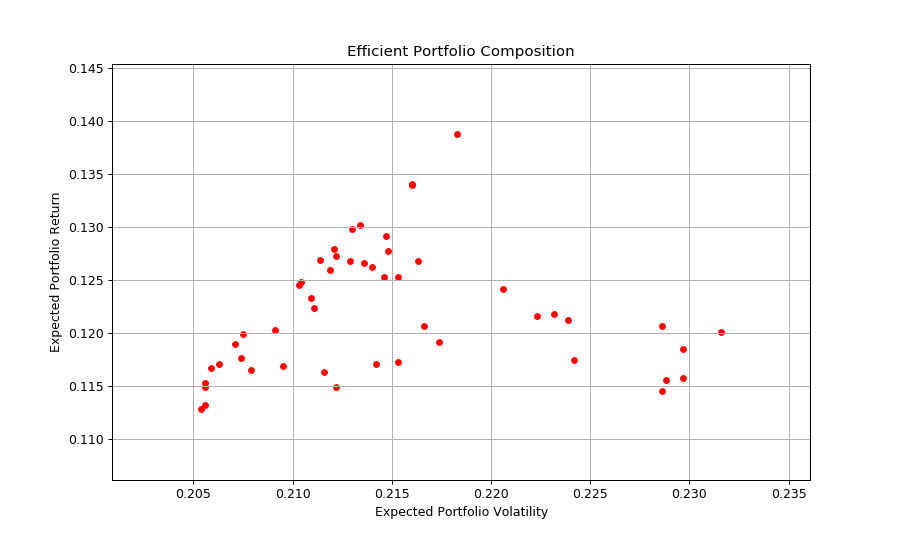

Text(0, 0.5, 'Expected Portfolio Return')

In [33]:
efficient_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="red",
    figsize=(10,6)
)
plt.grid(True)
plt.title("Efficient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
#plt.xlim(.05,.25)
#plt.ylim(-.1, .25)


In [ ]:
remaining_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="blue",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.hlines(.06, .17, .3, linestyle="dashed", colors="red")
#plt.xlim(.05,.50)
#plt.ylim(-.1, .25)

<IPython.core.display.Javascript object>


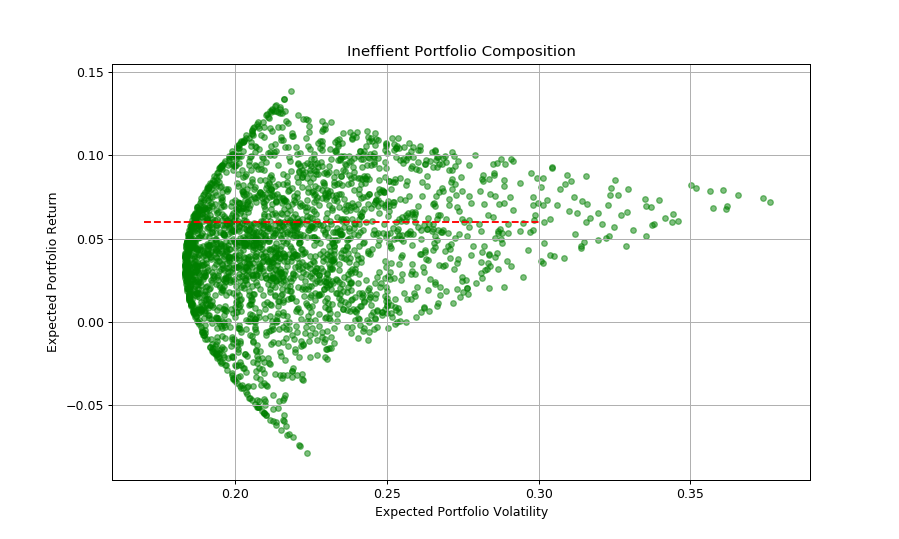

In [34]:
all_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="green",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.hlines(.06, .17, .3, linestyle="dashed", colors="red")
#plt.xlim(.15,.30)
#plt.ylim(-.1, .5)